Clustering project working with customer spending data across the world at a grocery retailer  

Questions:  
* will K Means clustering simply cluster into different regions and sales channels?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


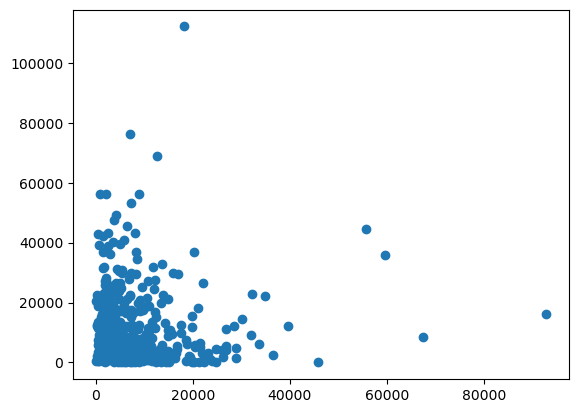

In [15]:
plt.scatter(df['Grocery'],df['Fresh'])

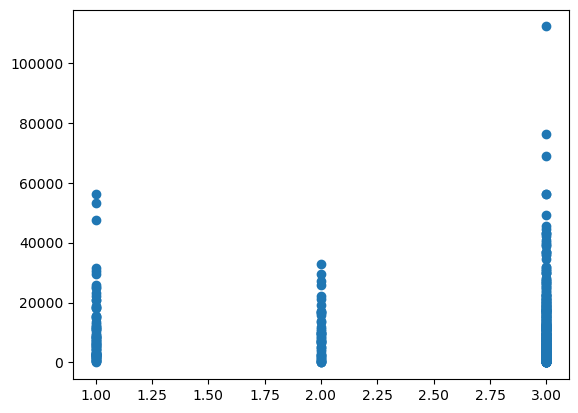

In [14]:
# should categorical variables be removed from clustering?
plt.scatter(df['Region'],df['Fresh'])

In [16]:
# distance based algo so need to scale
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [17]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [18]:
# previous scalling the mean is not 0 for all features
test = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

# statistics of scaled data
pd.DataFrame(test_scaled).describe()

,0,1,2,3,4,5
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Text(0, 0.5, 'Inertia')

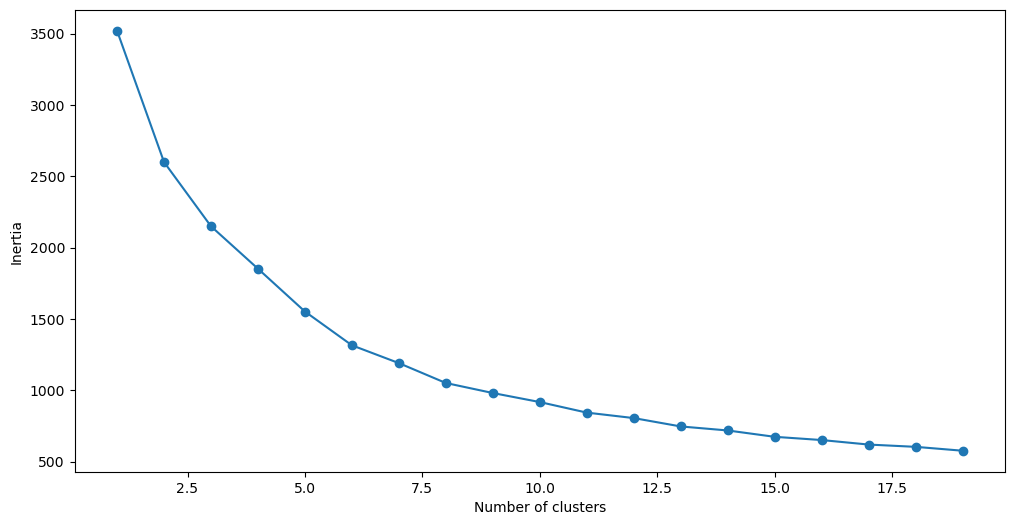

In [24]:
# cross vaidation unnecessary as there is no clear definition of error since we gave no labels

from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [31]:
# 6 clusters looks like it has potential based on the elbow plot

kmeans = KMeans(n_clusters=6, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

pred = kmeans.fit_predict(data_scaled)

In [32]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    224
2    127
5     62
4     16
1     10
3      1
Name: cluster, dtype: int64

In [36]:
len(pred)

440

In [51]:
df['cluster'] = pred
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,4
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


In [52]:
df['cluster'].unique()

array([2, 0, 4, 1, 3, 5], dtype=int32)

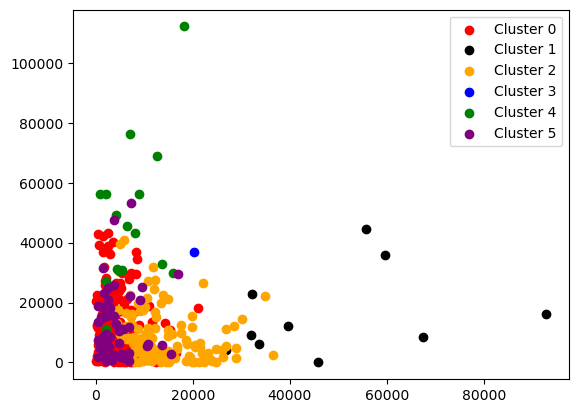

In [66]:
filter0 = df[df['cluster']==0]
filter1 = df[df['cluster']==1]
filter2 = df[df['cluster']==2]
filter3 = df[df['cluster']==3]
filter4 = df[df['cluster']==4]
filter5 = df[df['cluster']==5]


#plotting the results
plt.scatter(filter0['Grocery'], filter0['Fresh'], color='red', label='Cluster 0')
plt.scatter(filter1['Grocery'], filter1['Fresh'], color='black', label='Cluster 1')
plt.scatter(filter2['Grocery'], filter2['Fresh'], color='orange', label='Cluster 2')
plt.scatter(filter3['Grocery'], filter3['Fresh'], color='blue', label='Cluster 3')
plt.scatter(filter4['Grocery'], filter4['Fresh'], color='green', label='Cluster 4')
plt.scatter(filter5['Grocery'], filter5['Fresh'], color='purple', label='Cluster 5')
plt.legend()
plt.show()

In [61]:
# yhtey are from different regions
filter5['Region'].unique()

array([1, 2])

In [63]:
# they are from differnt channels
filter5['Channel'].unique()

array([1, 2])

In [64]:
# there is cross over such as cluster 5 and cluster 0 having overlap at region 2
filter0['Region'].unique()

array([3, 2])

customers in cluster 0,5,and 2 have largley similar buying habits compared with other clusters

In [68]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


In [ ]:
# helpful links
# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#Implementing_K-Means_Clustering_in_Python_From_Scratch
# https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2

In [75]:
# The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) 
# represents a better model that produces better clusters.

from sklearn.metrics import davies_bouldin_score
X = df.iloc[:,:-1]
y = df['cluster']

davies_bouldin_score(X,y)

6.137782530067881

In [76]:
# The higher the index the more separable the clusters. Useful for comparing
# multiple distance based clustering models

from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X,y)


82.32617747949116

In [77]:
# The closer the value of the silhouette score to 1 the better-separated the clusters.

from sklearn.metrics import silhouette_score
silhouette_score(X,y)


0.057091750674806076

Not the best cluster separation with this data set. There is some overlap between customer spending 
but we have been able to build some sort of profile based on our clustering